In [1]:
%matplotlib inline

In [30]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate, stats
import pylab
import os
matplotlib.style.use('ggplot')

OUTPUT_DIR = r'/Users/guydavidson/Documents/NS111/radioactive_decay_assignment'

In [49]:
MINERAL_NAME = 'name'
LATEX_FIGURE_FORMAT_ISOCHRON = """
\\begin{{figure}}[ht]
\t\\includegraphics[width=0.90\\textwidth]{{{name}}}
\t\\caption{{Isochron for {type} - line of best fit {daughter}$ = {c:.3f} + {m:.3f}${parent}, 
$R = {R:.3f}$, $R^2 = {R2:.3f}$}}
\\end{{figure}}
"""

def plot_isochron(rock_type, decay_constant, parent_isotope, daughter_isotope, *minerals):
    plt.figure(figsize=(12, 9), dpi=1600)
    plt.axhline(0, lw=3, ls='dashed', color='black', alpha=0.66)
    plt.axvline(0, lw=3, ls='dashed', color='black', alpha=0.66)
    plt.xlabel('Parent isotope ratio: {parent}'.format(parent=parent_isotope), fontsize=14)
    plt.ylabel('Daughter isotope ratio: {daughter}'.format(daughter=daughter_isotope), fontsize=14)
    title_format = r'Isochron Diagram for Granite using {parent} $\to$ {daughter} decay'
    plt.title(title_format.format(parent=parent_isotope, daughter=daughter_isotope))
    
    x_values, y_values = zip(*[(mineral[parent_isotope], mineral[daughter_isotope]) for mineral in minerals])
    #A = np.vstack([x_values, np.ones(len(x_values))]).T
    slope, intercept, r_value, _, _ = stats.linregress(x_values, y_values)
    print slope, intercept, r_value
    
    plt.annotate(r'Calculated initial {daughter}$ = {c:.3f}$'.format(daughter=daughter_isotope, c=intercept),
                xy=(0, intercept), xytext=(1, intercept - 0.1), fontsize=14,
                 arrowprops=dict(facecolor='black', shrink=0.10))
    
    time_value = np.log(slope + 1) / decay_constant 
    
    time_xy = (2, 2 * slope + intercept)
    text_xy = (0.2, 2 * slope + intercept + 0.1) 
    plt.annotate(r'Slope $m={m:.3f}$ implies $t={t:.3e}yr$'.format(m=slope, t=time_value),
                xy=time_xy, xytext=text_xy, fontsize=14,
                 arrowprops=dict(facecolor='black', shrink=0.10))
    
    new_xmax = max(x_values) + 0.5
    x_line_range = np.linspace(0, new_xmax, 50)
    line_label_format = 'Line of best fit: {daughter} = {c:.3f} + {m:.3f}{parent}\n$R={R:.3f}, R^2={R2:.3f}$'
    plt.plot(x_line_range, slope * x_line_range + intercept, '-', color='black',
            lw=3, label=line_label_format.format(daughter=daughter_isotope, parent=parent_isotope, 
                                                 m=slope, c=intercept, R=r_value, R2=r_value ** 2))
    
    for mineral in minerals:
        plt.plot(mineral[parent_isotope], mineral[daughter_isotope], 
                 'o', ms=15.0, alpha=0.75, label=mineral[MINERAL_NAME])

    plt.legend(loc=4)
    plt.xlim(xmin=-0.5, xmax=new_xmax)
    plt.ylim(ymin=-0.01)
    
    figure_name = 'isochron_{type}.png'.format(type=rock_type)
    plt.savefig(os.path.join(OUTPUT_DIR, figure_name))
    plt.show()
    
    print LATEX_FIGURE_FORMAT_ISOCHRON.format(name=figure_name, type=rock_type, daughter=daughter_isotope,
                                              c=intercept, m=slope, parent=parent_isotope, 
                                              R=r_value, R2 = r_value**2)


0.054157678858 0.703107834978 0.999999999558


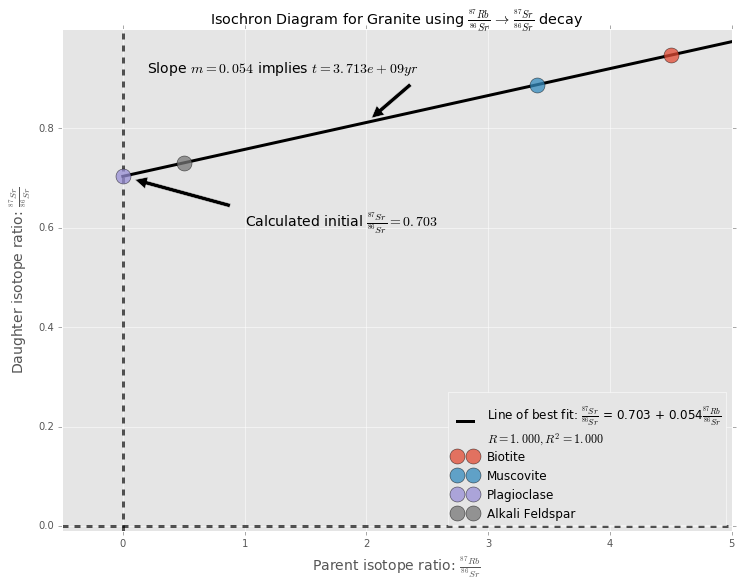


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{isochron_Granite.png}
	\caption{Isochron for Granite - line of best fit $\frac{^{87}Sr}{^{86}Sr}$$ = 0.703 + 0.054$$\frac{^{87}Rb}{^{86}Sr}$, 
$R = 1.000$, $R^2 = 1.000$}
\end{figure}



In [50]:
PARENT_ISOTOPE = r'$\frac{^{87}Rb}{^{86}Sr}$'
DAUGHTER_ISOTOPE = r'$\frac{^{87}Sr}{^{86}Sr}$'

biotite = {MINERAL_NAME: 'Biotite', PARENT_ISOTOPE: 4.5, DAUGHTER_ISOTOPE: 0.94682}
muscovite = {MINERAL_NAME: 'Muscovite', PARENT_ISOTOPE: 3.4, DAUGHTER_ISOTOPE: 0.88724}
plagioclase = {MINERAL_NAME: 'Plagioclase', PARENT_ISOTOPE: 0.001, DAUGHTER_ISOTOPE: 0.70316}
alkalai_feldspar = {MINERAL_NAME: 'Alkali Feldspar', PARENT_ISOTOPE: 0.5, DAUGHTER_ISOTOPE: 0.73019}

calculated_lambda = 1.4204 * 10 ** (-11)

plot_isochron('Granite', calculated_lambda, PARENT_ISOTOPE, DAUGHTER_ISOTOPE, 
              biotite, muscovite, plagioclase, alkalai_feldspar)

In [ ]:
plt.annotate?